                        Pet Classification Model Using CNN.
    
                                    Project 3 
        
DESCRIPTION

Project Objective:


Build a CNN model that classifies the given pet images correctly into dog and cat images. The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 

Project Description and Scope: 

You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data.

In [1]:
#Load Libraries
import tensorflow
import keras
import cv2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import os
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pickle

C:\Users\lloyd\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lloyd\anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lloyd\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Using TensorFlow backend.


#Observing some of the images

100%|██████████| 20/20 [00:00<00:00, 9446.63it/s]


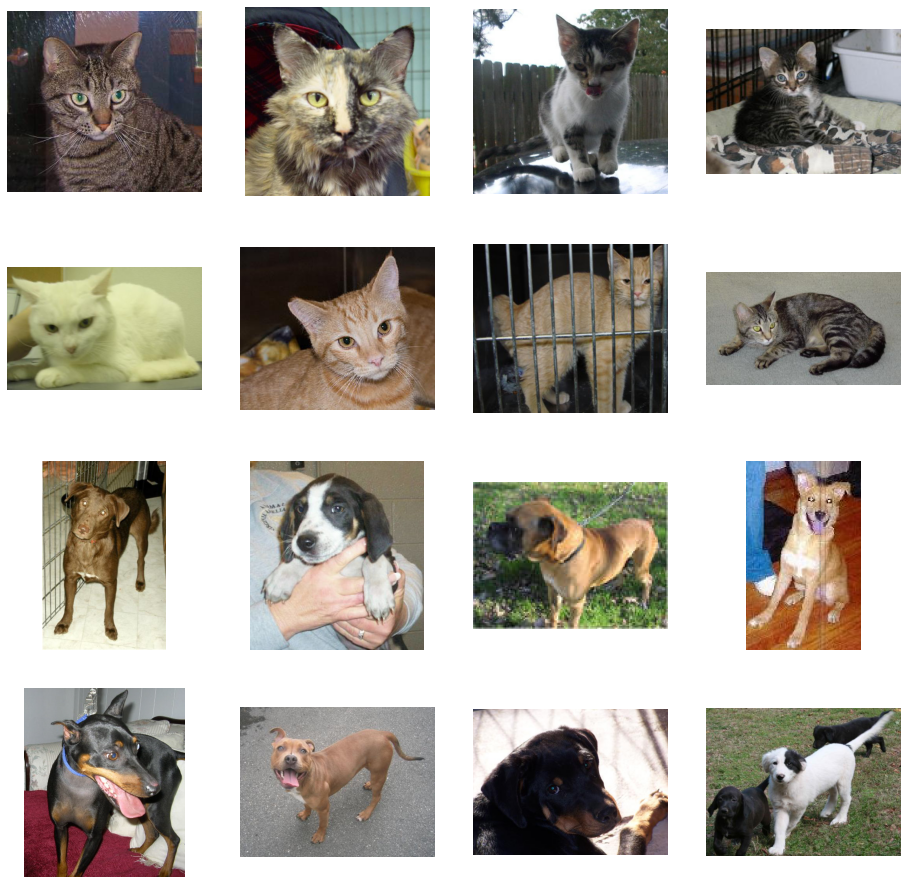

In [2]:
train_cat_file_names='E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/train/cats/'
train_dog_file_names='E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/train/dogs/'
cat_img_paths = [os.path.join(train_cat_file_names, filename) for filename in tqdm(os.listdir(train_cat_file_names))]
dog_img_paths = [os.path.join(train_dog_file_names, filename) for filename in tqdm(os.listdir(train_dog_file_names))]
fig = plt.figure(figsize=(16,8))
fig.set_size_inches(16, 16)
for i, img_path in enumerate(cat_img_paths[:8]+dog_img_paths[:8]):
    ax=plt.subplot(4,4,i+1)
    ax.axis('off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

### Data Augmentation

In [3]:
#path to parent directory
parent_dir = 'E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/'
#path to train folder
train_dir=os.path.join(parent_dir, 'train')
val_dir= os.path.join(parent_dir, 'test')
# directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(val_dir, 'cats')
validation_dogs_dir = os.path.join(val_dir, 'dogs')

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.2, 
                              width_shift_range=0.2, 
                              rotation_range=20, 
                              shear_range = 0.2,
                              zoom_range=0.2, fill_mode='nearest')
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(224, 224))
validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


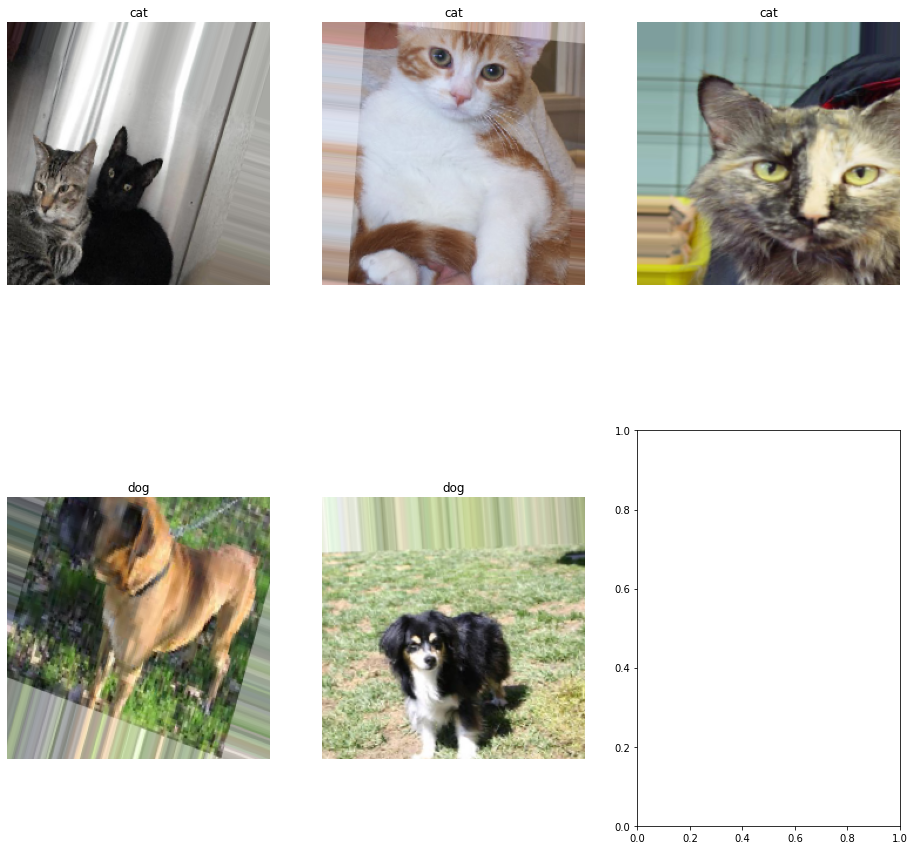

In [5]:
images, labels = next(train_generator)
fig, axes = plt.subplots(2, 3, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label == 1: 
        ax.set_title('dog')
    else:
        ax.set_title('cat')
    ax.axis('off')

Task 1: Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers:

    ● Input layer 

    ● Convolutional layer 1 with 32 filters of kernel size[5,5] 
    
    ● Pooling layer 1 with pool size[2,2] and stride 2 
    
    ● Convolutional layer 2 with 64 filters of kernel size[5,5] 
    
    ● Pooling layer 2 with pool size[2,2] and stride 2 
    
    ● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
    
    ● Dropout layer with dropout probability 0.4 
    
    Predict the class by doing a sigmoid on the output of the dropout layers. 

In [6]:
model=Sequential([Conv2D(32, kernel_size=(5,5), input_shape=(224,224,3), activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
           
          Conv2D(64, kernel_size=(5,5), activation='relu'),
          MaxPooling2D(pool_size=(2,2), strides=2),

          Flatten(),  
          Dense(32),
          Dropout(rate=0.4),
           
          Dense(1, activation='sigmoid'),
           ]
          )

Task 2: This should be followed by training and evaluation: 
    
    ● For the training step, define the loss function and minimize it 

In [7]:
#Compile Model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 179776)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5752864   
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [8]:
testX, testY = validation_generator.next()

Task 3: For the evaluation step, calculate the accuracy

        Run the program for 100

In [9]:
#Fit the model
model.fit(train_generator, epochs=100, validation_data=(testX, testY))

Epoch 1/100
8/8 [==============================] - 3s 343ms/step - loss: 3.4822 - accuracy: 0.3750 - val_loss: 0.6814 - val_accuracy: 1.0000
Epoch 2/100
8/8 [==============================] - 3s 387ms/step - loss: 0.7375 - accuracy: 0.6000 - val_loss: 1.5548 - val_accuracy: 0.4000
Epoch 3/100
8/8 [==============================] - 3s 362ms/step - loss: 0.7952 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.4000
Epoch 4/100
8/8 [==============================] - 3s 363ms/step - loss: 0.6933 - accuracy: 0.4750 - val_loss: 0.6938 - val_accuracy: 0.2000
Epoch 5/100
8/8 [==============================] - 3s 342ms/step - loss: 0.6934 - accuracy: 0.4750 - val_loss: 0.6930 - val_accuracy: 0.6000
Epoch 6/100
8/8 [==============================] - 3s 336ms/step - loss: 0.6933 - accuracy: 0.5250 - val_loss: 0.6925 - val_accuracy: 0.6000
Epoch 7/100
8/8 [==============================] - 3s 375ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 8/100
8

Epoch 59/100
8/8 [==============================] - 3s 355ms/step - loss: 0.6084 - accuracy: 0.6500 - val_loss: 0.6973 - val_accuracy: 0.6000
Epoch 60/100
8/8 [==============================] - 3s 352ms/step - loss: 0.5978 - accuracy: 0.5500 - val_loss: 0.7101 - val_accuracy: 0.6000
Epoch 61/100
8/8 [==============================] - 2s 307ms/step - loss: 0.7268 - accuracy: 0.5750 - val_loss: 0.7040 - val_accuracy: 0.6000
Epoch 62/100
8/8 [==============================] - 3s 386ms/step - loss: 0.6199 - accuracy: 0.6750 - val_loss: 0.7215 - val_accuracy: 0.4000
Epoch 63/100
8/8 [==============================] - 3s 370ms/step - loss: 0.6709 - accuracy: 0.5000 - val_loss: 0.7346 - val_accuracy: 0.4000
Epoch 64/100
8/8 [==============================] - 3s 350ms/step - loss: 0.6862 - accuracy: 0.6000 - val_loss: 0.6921 - val_accuracy: 0.6000
Epoch 65/100
8/8 [==============================] - 3s 343ms/step - loss: 0.6405 - accuracy: 0.5500 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 

Task 4: For the evaluation step, calculate the accuracy 
    
        Run the program for 200

In [10]:
#Fit the model
model.fit(train_generator, epochs=200, validation_data=(testX, testY))

Epoch 1/200
8/8 [==============================] - 3s 350ms/step - loss: 0.6122 - accuracy: 0.5250 - val_loss: 0.7045 - val_accuracy: 0.6000
Epoch 2/200
8/8 [==============================] - 3s 359ms/step - loss: 0.6038 - accuracy: 0.5750 - val_loss: 0.7003 - val_accuracy: 0.6000
Epoch 3/200
8/8 [==============================] - 3s 324ms/step - loss: 0.5922 - accuracy: 0.6250 - val_loss: 0.7230 - val_accuracy: 0.6000
Epoch 4/200
8/8 [==============================] - 3s 354ms/step - loss: 0.6313 - accuracy: 0.5750 - val_loss: 0.7162 - val_accuracy: 0.6000
Epoch 5/200
8/8 [==============================] - 3s 383ms/step - loss: 0.5845 - accuracy: 0.5000 - val_loss: 0.6675 - val_accuracy: 0.8000
Epoch 6/200
8/8 [==============================] - 3s 348ms/step - loss: 0.7553 - accuracy: 0.6500 - val_loss: 0.7010 - val_accuracy: 0.6000
Epoch 7/200
8/8 [==============================] - 3s 347ms/step - loss: 0.6053 - accuracy: 0.6000 - val_loss: 0.6955 - val_accuracy: 0.6000
Epoch 8/200
8

8/8 [==============================] - 5s 622ms/step - loss: 0.6922 - accuracy: 0.5750 - val_loss: 0.7162 - val_accuracy: 0.0000e+00
Epoch 59/200
8/8 [==============================] - 5s 623ms/step - loss: 0.6108 - accuracy: 0.5750 - val_loss: 0.7085 - val_accuracy: 0.0000e+00
Epoch 60/200
8/8 [==============================] - 6s 715ms/step - loss: 0.6272 - accuracy: 0.4500 - val_loss: 0.7061 - val_accuracy: 0.0000e+00
Epoch 61/200
8/8 [==============================] - 3s 428ms/step - loss: 0.6168 - accuracy: 0.6000 - val_loss: 0.7070 - val_accuracy: 0.0000e+00
Epoch 62/200
8/8 [==============================] - 3s 434ms/step - loss: 0.6221 - accuracy: 0.5000 - val_loss: 0.7137 - val_accuracy: 0.0000e+00
Epoch 63/200
8/8 [==============================] - 3s 415ms/step - loss: 0.5838 - accuracy: 0.7000 - val_loss: 0.7347 - val_accuracy: 0.0000e+00
Epoch 64/200
8/8 [==============================] - 3s 390ms/step - loss: 0.6386 - accuracy: 0.5750 - val_loss: 0.7456 - val_accuracy: 0.

8/8 [==============================] - 3s 315ms/step - loss: 0.5528 - accuracy: 0.5750 - val_loss: 0.7032 - val_accuracy: 0.0000e+00
Epoch 116/200
8/8 [==============================] - 3s 322ms/step - loss: 0.5777 - accuracy: 0.5500 - val_loss: 0.7023 - val_accuracy: 0.0000e+00
Epoch 117/200
8/8 [==============================] - 3s 349ms/step - loss: 0.5636 - accuracy: 0.5000 - val_loss: 0.7010 - val_accuracy: 0.0000e+00
Epoch 118/200
8/8 [==============================] - 3s 337ms/step - loss: 0.6357 - accuracy: 0.6000 - val_loss: 0.6978 - val_accuracy: 0.4000
Epoch 119/200
8/8 [==============================] - 2s 311ms/step - loss: 0.6031 - accuracy: 0.5250 - val_loss: 0.7002 - val_accuracy: 0.2000
Epoch 120/200
8/8 [==============================] - 3s 315ms/step - loss: 0.5663 - accuracy: 0.6250 - val_loss: 0.6998 - val_accuracy: 0.2000
Epoch 121/200
8/8 [==============================] - 3s 321ms/step - loss: 0.5698 - accuracy: 0.5250 - val_loss: 0.7037 - val_accuracy: 0.2000
E

8/8 [==============================] - 3s 368ms/step - loss: 0.5093 - accuracy: 0.7000 - val_loss: 0.6974 - val_accuracy: 0.4000
Epoch 173/200
8/8 [==============================] - 3s 358ms/step - loss: 0.5152 - accuracy: 0.6750 - val_loss: 0.6969 - val_accuracy: 0.4000
Epoch 174/200
8/8 [==============================] - 3s 343ms/step - loss: 0.5653 - accuracy: 0.5750 - val_loss: 0.6973 - val_accuracy: 0.4000
Epoch 175/200
8/8 [==============================] - 3s 327ms/step - loss: 0.5785 - accuracy: 0.6750 - val_loss: 0.7255 - val_accuracy: 0.2000
Epoch 176/200
8/8 [==============================] - 3s 345ms/step - loss: 0.5579 - accuracy: 0.6750 - val_loss: 0.7191 - val_accuracy: 0.2000
Epoch 177/200
8/8 [==============================] - 3s 367ms/step - loss: 0.6561 - accuracy: 0.5750 - val_loss: 0.7028 - val_accuracy: 0.4000
Epoch 178/200
8/8 [==============================] - 3s 350ms/step - loss: 0.5864 - accuracy: 0.5750 - val_loss: 0.6938 - val_accuracy: 0.4000
Epoch 179/200

Task 5: For the evaluation step, calculate the accuracy 
    
        Run the program for 300

In [11]:
#Fit the model
model.fit(train_generator, epochs=300, validation_data=(testX, testY))

Epoch 1/300
8/8 [==============================] - 3s 370ms/step - loss: 0.4895 - accuracy: 0.6750 - val_loss: 0.6729 - val_accuracy: 0.2000
Epoch 2/300
8/8 [==============================] - 3s 342ms/step - loss: 0.5404 - accuracy: 0.6000 - val_loss: 0.6893 - val_accuracy: 0.4000
Epoch 3/300
8/8 [==============================] - 3s 318ms/step - loss: 0.5245 - accuracy: 0.6500 - val_loss: 0.6913 - val_accuracy: 0.4000
Epoch 4/300
8/8 [==============================] - 3s 316ms/step - loss: 0.5205 - accuracy: 0.7000 - val_loss: 0.6845 - val_accuracy: 0.4000
Epoch 5/300
8/8 [==============================] - 3s 331ms/step - loss: 0.5847 - accuracy: 0.6500 - val_loss: 0.6834 - val_accuracy: 0.4000
Epoch 6/300
8/8 [==============================] - 3s 370ms/step - loss: 0.5326 - accuracy: 0.6250 - val_loss: 0.6925 - val_accuracy: 0.4000
Epoch 7/300
8/8 [==============================] - 3s 387ms/step - loss: 0.5241 - accuracy: 0.6500 - val_loss: 0.6824 - val_accuracy: 0.4000
Epoch 8/300
8

Epoch 59/300
8/8 [==============================] - 3s 331ms/step - loss: 0.5264 - accuracy: 0.6250 - val_loss: 0.7241 - val_accuracy: 0.2000
Epoch 60/300
8/8 [==============================] - 3s 344ms/step - loss: 0.5345 - accuracy: 0.6250 - val_loss: 0.7198 - val_accuracy: 0.2000
Epoch 61/300
8/8 [==============================] - 3s 367ms/step - loss: 0.5136 - accuracy: 0.6750 - val_loss: 0.7205 - val_accuracy: 0.2000
Epoch 62/300
8/8 [==============================] - 3s 357ms/step - loss: 0.5087 - accuracy: 0.6750 - val_loss: 0.7220 - val_accuracy: 0.2000
Epoch 63/300
8/8 [==============================] - 3s 362ms/step - loss: 0.5433 - accuracy: 0.6250 - val_loss: 0.7221 - val_accuracy: 0.2000
Epoch 64/300
8/8 [==============================] - 3s 328ms/step - loss: 0.5871 - accuracy: 0.5500 - val_loss: 0.7042 - val_accuracy: 0.4000
Epoch 65/300
8/8 [==============================] - 3s 385ms/step - loss: 0.5391 - accuracy: 0.6250 - val_loss: 0.6826 - val_accuracy: 0.4000
Epoch 

8/8 [==============================] - 3s 341ms/step - loss: 0.4787 - accuracy: 0.7250 - val_loss: 0.6099 - val_accuracy: 0.6000
Epoch 117/300
8/8 [==============================] - 3s 342ms/step - loss: 0.4710 - accuracy: 0.7750 - val_loss: 0.9672 - val_accuracy: 0.6000
Epoch 118/300
8/8 [==============================] - 3s 345ms/step - loss: 0.5421 - accuracy: 0.7000 - val_loss: 0.7688 - val_accuracy: 0.6000
Epoch 119/300
8/8 [==============================] - 3s 363ms/step - loss: 0.4288 - accuracy: 0.7750 - val_loss: 0.8954 - val_accuracy: 0.6000
Epoch 120/300
8/8 [==============================] - 3s 379ms/step - loss: 0.4542 - accuracy: 0.7250 - val_loss: 0.9274 - val_accuracy: 0.6000
Epoch 121/300
8/8 [==============================] - 3s 361ms/step - loss: 0.4807 - accuracy: 0.7750 - val_loss: 0.8203 - val_accuracy: 0.6000
Epoch 122/300
8/8 [==============================] - 3s 326ms/step - loss: 0.5218 - accuracy: 0.7250 - val_loss: 0.6481 - val_accuracy: 0.6000
Epoch 123/300

8/8 [==============================] - 3s 350ms/step - loss: 0.5180 - accuracy: 0.7250 - val_loss: 0.5055 - val_accuracy: 0.4000
Epoch 174/300
8/8 [==============================] - 3s 369ms/step - loss: 0.4921 - accuracy: 0.7250 - val_loss: 0.5086 - val_accuracy: 0.4000
Epoch 175/300
8/8 [==============================] - 3s 346ms/step - loss: 0.6519 - accuracy: 0.7750 - val_loss: 0.5149 - val_accuracy: 0.6000
Epoch 176/300
8/8 [==============================] - 3s 351ms/step - loss: 0.4971 - accuracy: 0.7250 - val_loss: 0.5005 - val_accuracy: 0.6000
Epoch 177/300
8/8 [==============================] - 3s 367ms/step - loss: 0.4717 - accuracy: 0.7500 - val_loss: 0.5009 - val_accuracy: 0.6000
Epoch 178/300
8/8 [==============================] - 3s 368ms/step - loss: 0.4297 - accuracy: 0.7750 - val_loss: 0.5009 - val_accuracy: 0.6000
Epoch 179/300
8/8 [==============================] - 3s 343ms/step - loss: 0.4375 - accuracy: 0.7250 - val_loss: 0.5143 - val_accuracy: 0.6000
Epoch 180/300

8/8 [==============================] - 3s 355ms/step - loss: 0.4948 - accuracy: 0.7750 - val_loss: 0.5091 - val_accuracy: 0.8000
Epoch 231/300
8/8 [==============================] - 3s 361ms/step - loss: 0.4544 - accuracy: 0.7500 - val_loss: 0.5170 - val_accuracy: 0.8000
Epoch 232/300
8/8 [==============================] - 3s 340ms/step - loss: 0.5134 - accuracy: 0.6500 - val_loss: 0.5150 - val_accuracy: 0.6000
Epoch 233/300
8/8 [==============================] - 3s 342ms/step - loss: 0.3794 - accuracy: 0.8500 - val_loss: 0.4592 - val_accuracy: 1.0000
Epoch 234/300
8/8 [==============================] - 3s 367ms/step - loss: 0.4284 - accuracy: 0.7750 - val_loss: 0.3600 - val_accuracy: 1.0000
Epoch 235/300
8/8 [==============================] - 3s 357ms/step - loss: 0.4897 - accuracy: 0.7500 - val_loss: 0.3086 - val_accuracy: 1.0000
Epoch 236/300
8/8 [==============================] - 3s 348ms/step - loss: 0.6187 - accuracy: 0.7250 - val_loss: 0.3044 - val_accuracy: 1.0000
Epoch 237/300

8/8 [==============================] - 3s 330ms/step - loss: 0.5627 - accuracy: 0.6500 - val_loss: 0.2314 - val_accuracy: 1.0000
Epoch 288/300
8/8 [==============================] - 3s 372ms/step - loss: 0.2844 - accuracy: 0.8750 - val_loss: 0.2264 - val_accuracy: 1.0000
Epoch 289/300
8/8 [==============================] - 3s 365ms/step - loss: 0.4300 - accuracy: 0.7750 - val_loss: 0.1611 - val_accuracy: 1.0000
Epoch 290/300
8/8 [==============================] - 3s 340ms/step - loss: 0.3405 - accuracy: 0.8500 - val_loss: 0.2262 - val_accuracy: 0.8000
Epoch 291/300
8/8 [==============================] - 3s 330ms/step - loss: 0.5217 - accuracy: 0.8250 - val_loss: 0.1617 - val_accuracy: 1.0000
Epoch 292/300
8/8 [==============================] - 2s 308ms/step - loss: 0.4998 - accuracy: 0.7000 - val_loss: 0.3850 - val_accuracy: 1.0000
Epoch 293/300
8/8 [==============================] - 2s 309ms/step - loss: 0.4668 - accuracy: 0.7250 - val_loss: 0.4725 - val_accuracy: 0.8000
Epoch 294/300

In [15]:
with open('cnn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

TypeError: cannot pickle '_thread.RLock' object